### Analysis of 50000 Annotated Tweets

In this notebook, we analyze the distribution of 50,000 tweets that have been annotated using the GPT-3.5 Turbo model. The goal of this analysis is to explore patterns and trends in the data based on the annotations provided by the language model. 

In [94]:
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
from collections import Counter

In [95]:
df_first = pd.read_csv('Ann/First_Half.csv')
df_second = pd.read_csv('Ann/Second_Half.csv')
train = pd.read_csv('train.csv')

/tmp/ipykernel_50/3233313529.py:2: DtypeWarning: Columns (1,2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_second = pd.read_csv('Ann/Second_Half.csv')


In [99]:
df = pd.concat([df_first, df_second], axis=0, ignore_index=True)

In [100]:
df.head()

,Unnamed: 0,id,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,...,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq,Sentiment
0,0,126727,False,Herd immunity has been reached.,0.0,"Andrew Brigden MP is clearly a virologist, sta...",707.0,996.0,79417.0,35776.0,...,1.0,4.0,0.0,0.0,0.0,17.0,1.0,4.0,24.0,Valence: Negative\nArousal: Medium
1,1,98481,False,The Biden administration lost 20 million COVID...,0.0,@RepMattGaetz I do not understand How trump lo...,426.0,633.0,2363.0,16762.0,...,2.0,7.0,3.0,0.0,0.0,8.0,4.0,0.0,45.0,Valence: negative\nArousal: medium
2,2,45066,True,"""The United States is one of only seven nation...",1.0,Only four nations allow elective abortions aft...,99.0,86.0,3.0,1768.0,...,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,12.0,Valence: negative\nArousal: low
3,3,62614,True,"""Marijuana is less addictive than both alcohol...",1.0,@brhodes Agreed. It's time to stop demonizing ...,155.0,360.0,18310.0,7408.0,...,1.0,1.0,0.0,0.0,0.0,15.0,3.0,3.0,24.0,"['negative', 'medium']"
4,4,15038,True,"New York has passed ""the best paid family leav...",1.0,@shortiemagee New York State passed a law mand...,401.0,1446.0,7408.0,22668.0,...,2.0,3.0,0.0,0.0,0.0,20.0,8.0,5.0,30.0,Valence: positive\nArousal: low


In [102]:
reg_one_valence = r"(?<=valence: )[a-z]+"
reg_two_arousal = r"(?<=arousal: )[a-z]+"

def checkt_contain(text, category):

    try:
        categories = {
            'arousal':["low","medium","high"],
            'valence':["negative", "neutral","positive"]
        }

        for label in categories[category]:
            if label in text:
                return label
    except:
        print(text)
    

def format_str(text):
    arousal = ''
    valence = ''
    text = str(text).lower()
    try:
        if '[' in text:
            try:
                return ast.literal_eval(text)
            except:
                pattern = r'valence:\s*(\w+).*arousal:\s*(\w+)'
                match = re.search(pattern, text)
                if match:
                    valence, arousal = match.groups()
                    return [valence, arousal]
                else:
                    standardized_string = text.replace('‘', "'").replace('’', "'")
                    return ast.literal_eval(standardized_string)

        else:
            match_valence = re.search(reg_one_valence, text)
            match_arousal = re.search(reg_two_arousal, text)

            if match_valence:
                valence = match_valence.group(0)
            else:
                valence = checkt_contain(text, 'valence')
            if match_arousal:
                arousal = match_arousal.group(0)
            else:
                arousal = checkt_contain(text, 'arousal')

        return [valence, arousal]
    except:
        print(text)
        return None

### Distribution for Valence Arousal

In [103]:
valence_list = []
arousal_list = []
for data in df['Sentiment']:
    ls = format_str(data)
    valence = None
    arousal = None
    if ls is not None:
        valence, arousal = ls
    valence_list.append(valence)
    arousal_list.append(arousal)
df['valence'] = valence_list
df['arousal'] = arousal_list
df = df.dropna(subset=['arousal', 'valence'])

['negative', 'neutral'] for valence and arousal
['negative', 'neutral'] for valence
['low'] for arousal
['negative', 'neutral'] for valence
['high'] for arousal
['negative', 'neutral'] for valence
['high'] for arousal
['negative', 'neutral'] for valence
['medium'] for arousal
['negative', 'positive'] for valence
['high'] for arousal


In [106]:
df['fake']= df['BinaryNumTarget']

In [108]:
valence = df['valence']
arousal = df['arousal']

In [109]:
valence_counts = Counter(valence)
arousal_counts = Counter(arousal)
print(valence_counts)
print(arousal_counts)

Counter({'negative': 37914, 'neutral': 8577, 'positive': 3494, 'mixed': 1})
Counter({'high': 21808, 'medium': 15532, 'low': 12548, 'neutral': 98})


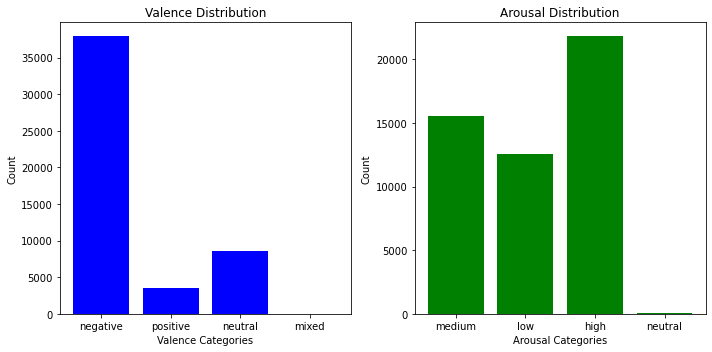

In [110]:
labels_valence = list(valence_counts.keys())
values_valence = list(valence_counts.values())

labels_arousal = list(arousal_counts.keys())
values_arousal = list(arousal_counts.values())

# Erstelle das Säulendiagramm für Valence
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Erstes Subplot (links)
plt.bar(labels_valence, values_valence, color='blue')
plt.title('Valence Distribution')
plt.xlabel('Valence Categories')
plt.ylabel('Count')

# Erstelle das Säulendiagramm für Arousal
plt.subplot(1, 2, 2)  # Zweites Subplot (rechts)
plt.bar(labels_arousal, values_arousal, color='green')
plt.title('Arousal Distribution')
plt.xlabel('Arousal Categories')
plt.ylabel('Count')

# Layout anpassen und Diagramm anzeigen
plt.tight_layout()
plt.show()


### Distribution divided into Fake not Fake

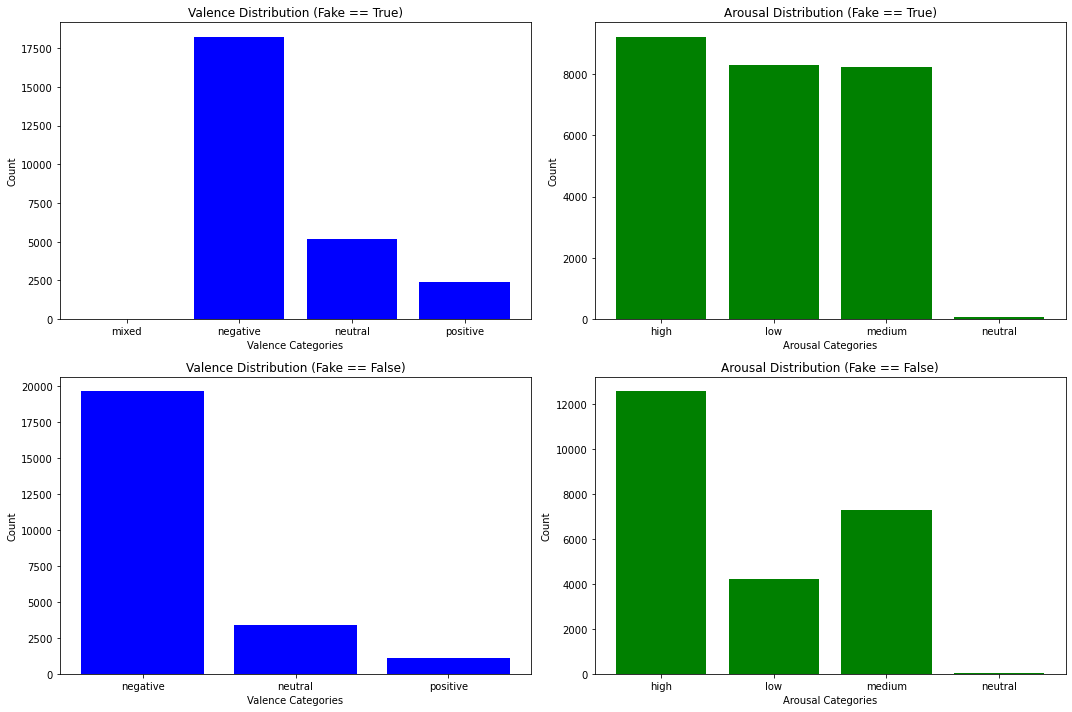

In [111]:
import matplotlib.pyplot as plt

df_true = df[df['fake'] == True]
df_false = df[df['fake'] == False]

valence_counts_true = df_true['valence'].value_counts().sort_index()
arousal_counts_true = df_true['arousal'].value_counts().sort_index()
valence_counts_false = df_false['valence'].value_counts().sort_index()
arousal_counts_false = df_false['arousal'].value_counts().sort_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(valence_counts_true.index, valence_counts_true.values, color='blue')
axs[0, 0].set_title('Valence Distribution (Fake == True)')
axs[0, 0].set_xlabel('Valence Categories')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(arousal_counts_true.index, arousal_counts_true.values, color='green')
axs[0, 1].set_title('Arousal Distribution (Fake == True)')
axs[0, 1].set_xlabel('Arousal Categories')
axs[0, 1].set_ylabel('Count')

axs[1, 0].bar(valence_counts_false.index, valence_counts_false.values, color='blue')
axs[1, 0].set_title('Valence Distribution (Fake == False)')
axs[1, 0].set_xlabel('Valence Categories')
axs[1, 0].set_ylabel('Count')

axs[1, 1].bar(arousal_counts_false.index, arousal_counts_false.values, color='green')
axs[1, 1].set_title('Arousal Distribution (Fake == False)')
axs[1, 1].set_xlabel('Arousal Categories')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 

/tmp/ipykernel_50/3638851623.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(counts_true.index, rotation=45, ha='right')
/tmp/ipykernel_50/3638851623.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(counts_false.index, rotation=45, ha='right')


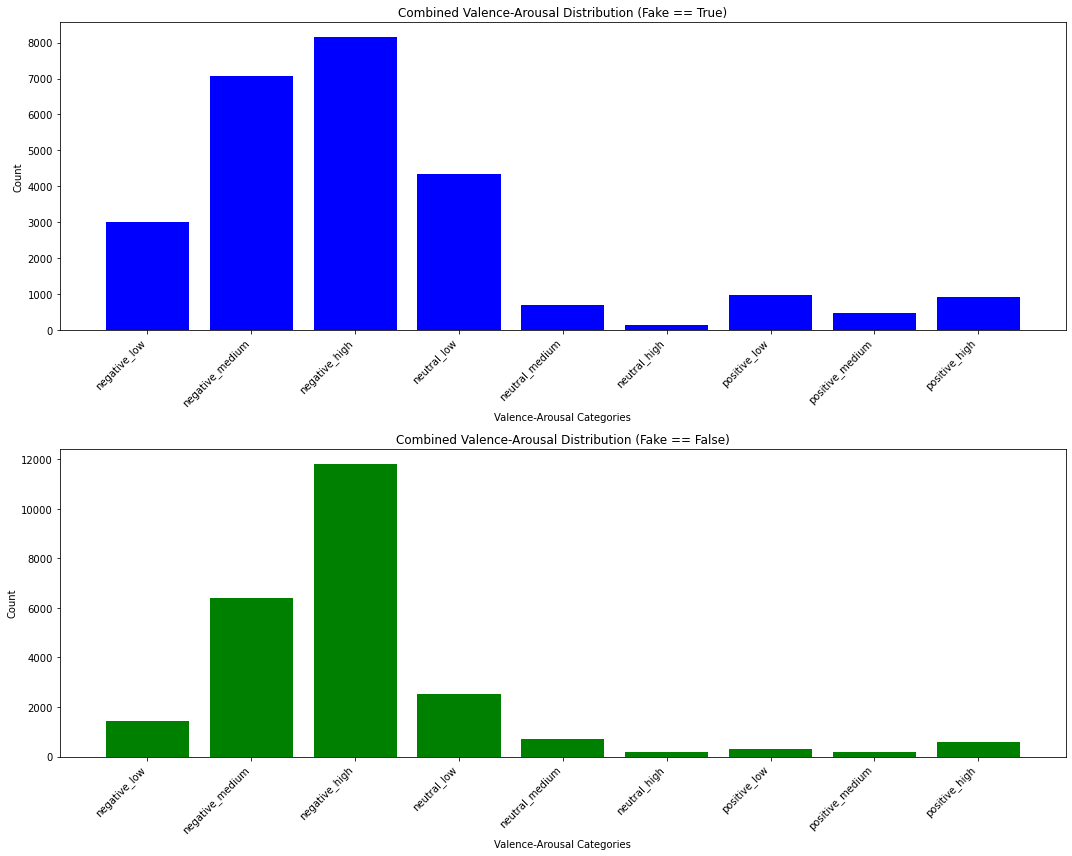

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df['combined_cat'] = df['valence'] + '_' + df['arousal']

df_true = df[df['fake'] == True]
df_false = df[df['fake'] == False]

counts_true = df_true['combined_cat'].value_counts()
counts_false = df_false['combined_cat'].value_counts()

all_categories = ['negative_low', 'negative_medium', 'negative_high',
                  'neutral_low', 'neutral_medium', 'neutral_high',
                  'positive_low', 'positive_medium', 'positive_high']

counts_true = counts_true.reindex(all_categories, fill_value=0)
counts_false = counts_false.reindex(all_categories, fill_value=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Fake == True
ax1.bar(counts_true.index, counts_true.values, color='blue')
ax1.set_title('Combined Valence-Arousal Distribution (Fake == True)')
ax1.set_xlabel('Valence-Arousal Categories')
ax1.set_ylabel('Count')
ax1.set_xticklabels(counts_true.index, rotation=45, ha='right')

# Fake == False
ax2.bar(counts_false.index, counts_false.values, color='green')
ax2.set_title('Combined Valence-Arousal Distribution (Fake == False)')
ax2.set_xlabel('Valence-Arousal Categories')
ax2.set_ylabel('Count')
ax2.set_xticklabels(counts_false.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()